# Drawing to Learn Science

All work was done at the Learning and Instruction in Multimedia Environments (LIME) lab at the University of California, San Diego.

## Overview

Researchers have studied whether drawing helps students learn the structure and function of physical systems. Although the results are mixed and not all find a benefit to drawing (Van Meter and Garner 2005), they generally find that the efficacy of drawing to learn depends on a few factors. These factors include the accuracy of the drawing, the prior knowledge of the learner, and the level of guidance provided during the drawing process (Fiorella & Zhang, 2018), where novices benefit from greater guidance (Van Meter, 2001). However, what if the accuracy of the learners’ drawings did not matter? We propose that when there is no correct way to represent the contents of a lesson in a drawing, it is less important that students draw exactly what an instructor would produce as these representations are arbitrary. This may mean that even without guidance, student-generated drawings may improve learning by more effectively capturing students’ thinking and prompting them to build visual representations that they find memorable. In two experiments, undergraduates were randomly assigned to either study or copy an instructor-created drawing, complete a scaffolded drawing worksheet, or to draw on a blank sheet of paper while reading about an abstract concept or a physical system. 

To give you a sense of what we mean by drawing to learn, here is an example of a drawing produced by a student in the experiment. 

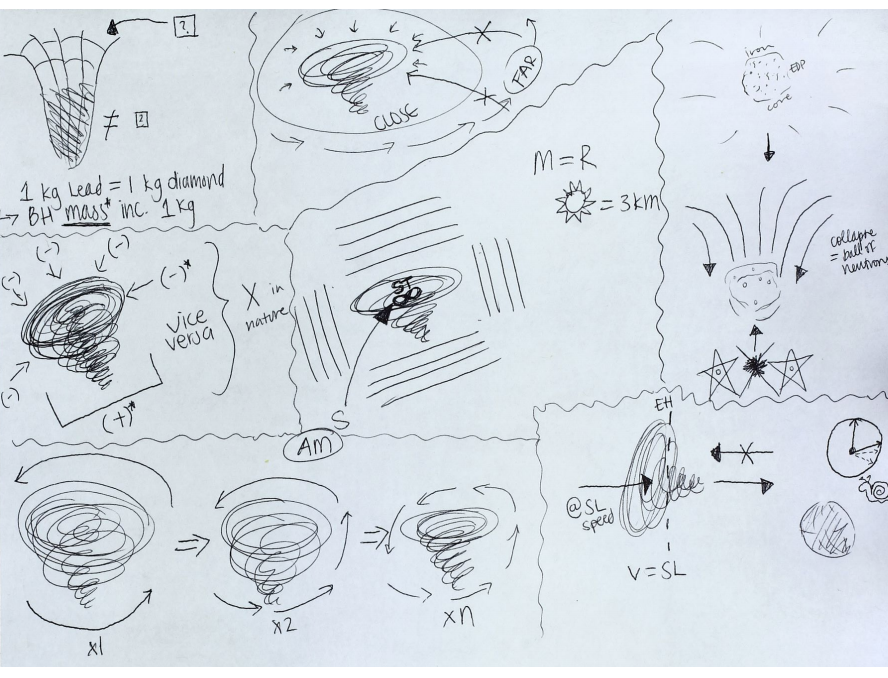

## Research Questions 

1. Is drawing an effective strategy when used to learn science?
2. Does the efficacy of drawing to learn depend on the contents of the lesson?
3. Is drawing a more useful tool when learning about abstract concepts compared to physical systems? 

# Hypotheses

1. The efficacy of drawing to learn will depend on the contents of the lesson such that drawing will encourage meaningful learning only when the contents of the lesson cannot be represented as a physical system. 
2. Meaningful learning will improve as students generate more of their own drawing (i.e., participants who draw will do better than those who complete a scaffolded worksheet, and those who complete a scaffolded worksheet will do better than those who copied the same worksheet, etc.)

Lets analyze the data to see what we find. 

## Setup

In [1]:
from sarah_functions import*

# Basic data science packages
import numpy as np
import pandas as pd
import scipy as sp

# for cleaning
import datetime
import string

# For analyses
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

# For visualization
from PIL import Image
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# The seaborn library makes plots look nicer
sns.set(style = "darkgrid", palette = 'rocket', font_scale = 2,rc = {"lines.linewidth":2.5})
sns.set_context('talk')

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Set matplotlib preferences
font = {'family' : 'Bitstream Vera Sans',
        'weight' : 'regular',
        'size'   : 13}

# set standard fig size
figure = {'figsize' : (10,8)}

plt.rc('font', **font)
plt.rc('figure', **figure)

In [3]:
df = pd.read_excel('/Users/sarahamiraslani/Desktop/Black_holes+coding.xlsx')

In [4]:
df.head(2)
# df_bh.shape

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,VVIQ16,Q126,SC0,Test Order,total retention (jiawen),total retention (sarah),lowest retention,total transfer (Jiawen),total transfer (Sarah),Lowest Transfer
0,2019-04-08 14:51:32,2019-04-08 15:28:57,0,132.239.182.138,100,2245,1,2019-04-08 15:28:58.352,R_1mDlxbJ3HlQzADi,NaN,...,1.0,NaN,100,AB,4.0,4.0,4.0,3.0,4.0,3.0
1,2019-04-08 14:52:13,2019-04-08 15:30:04,0,132.239.182.140,100,2271,1,2019-04-08 15:30:05.152,R_3HqzxCZyweOsA12,NaN,...,3.0,NaN,69,AB,2.0,2.0,2.0,3.0,3.0,3.0


In [5]:
wrds_df = df[['R1','R2','R3','R4','T1','T2','T3','T4']].copy()

In [6]:
wrds_df['R_all']=wrds_df['R1']+wrds_df['R2']+wrds_df['R3']+wrds_df['R4']
wrds_df['T_all']=wrds_df['T1']+wrds_df['T2']+wrds_df['T3']+wrds_df['T4']
wrds_df.head(2)

,R1,R2,R3,R4,T1,T2,T3,T4,R_all,T_all
0,A black hole is an indefinite space. It is nam...,Two stars collapse,The black is made up of a center (a ball of ne...,singularity is the enlargment of a center beca...,As a rocket approaches the center of a black h...,It did not exceed the mass of both stars,"Me, since time is less near black holes",6 solar masses is greater than the 3 neede for...,A black hole is an indefinite space. It is nam...,As a rocket approaches the center of a black h...
1,a black hole is a hole in space that is black ...,A black hole can be formed by the collision of...,angular momemtum,space and time are similar in that time seems ...,"if it gets close enough to the black hole, it ...",the explosion may not have been as large as it...,"I have, since them moving closer makes time go...",it would produce a black hole,a black hole is a hole in space that is black ...,"if it gets close enough to the black hole, it ..."


In [7]:
df['ret_unique_wrds']= wrds_df['R_all'].apply(unique_word_calc)
df['trans_unique_wrds']= wrds_df['T_all'].apply(unique_word_calc)

df['ret_total_wrds']= wrds_df['R_all'].apply(total_word_calc)
df['trans_total_wrds']= wrds_df['T_all'].apply(total_word_calc)

In [8]:
df.head(2)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,total retention (jiawen),total retention (sarah),lowest retention,total transfer (Jiawen),total transfer (Sarah),Lowest Transfer,ret_unique_wrds,trans_unique_wrds,ret_total_wrds,trans_total_wrds
0,2019-04-08 14:51:32,2019-04-08 15:28:57,0,132.239.182.138,100,2245,1,2019-04-08 15:28:58.352,R_1mDlxbJ3HlQzADi,NaN,...,4.0,4.0,4.0,3.0,4.0,3.0,48,33,89,44
1,2019-04-08 14:52:13,2019-04-08 15:30:04,0,132.239.182.140,100,2271,1,2019-04-08 15:30:05.152,R_3HqzxCZyweOsA12,NaN,...,2.0,2.0,2.0,3.0,3.0,3.0,29,33,45,43


## Data Cleaning

In [9]:
# Qualtrics exports lots of extra columns that we wont use in analyses

# dropping extra columns
useless_cols = [ 'StartDate','EndDate', 'Status','IPAddress','ResponseId',
                'Progress','Finished','RecipientLastName', 'RecipientEmail', 
                'ExternalReference','LocationLatitude', 'LocationLongitude', 
                'DistributionChannel','Time on demographics_First Click',
                'Time on demographics_Last Click','Time on demographics_Page Submit', 
                'Time on demographics_Click Count', 'Time on PK_First Click',
                'Time on PK_Last Click','Time on PK_Page Submit','Time on PK_Click Count',
                'Time, Test A, Part 1_First Click','Time, Test A, Part 1_Click Count',
                "Time, Test A, Part 1_Last Click" , "Time, Test A, P2_First Click",
                "Time, Test A, P2_Last Click","Time, Test A, P2_Click Count", 
                "Time, Test A, P3_First Click","Time, Test A, P3_Last Click",
                "Time, Test A, P3_Click Count", 'Time, Test B, P1_First Click',
                'Time, Test B, P1_Last Click','Time, Test B, P1_Click Count', 
                'Time TestB, P2_First Click','Time TestB, P2_Last Click',
                "Time TestB, P2_Click Count",'Time, TestB, P3_First Click',
                'Time, TestB, P3_Last Click','Time, TestB, P3_Click Count',
                'Q162_First Click','Q162_Last Click','Time reading_First Click',
                'Time reading_Last Click','Time reading_Click Count', 'Q113_First Click',
                'Q113_Last Click','Q113_Click Count','Q114_First Click','Q114_Last Click',
                'Q115_First Click','Q115_Last Click','Q115_Click Count','Q114_Click Count',
                'Q115_First Click','Q115_Last Click','Q115_Click Count', 'Time_First Click',
                'Time_Last Click','Time_Click Count','SC0', 'UserLanguage','RecipientFirstName',
                'Q162_Click Count','SC0','R1 confidence','R2 confidence','R3 confidence',
                'R4 confidence', 'T1 confidence','T2 confidence','T3 confidence','T4 confidence']

df.drop(useless_cols, axis = 1,inplace = True)

In [10]:
# Change the names of the columns

# Coursse_history
df['Course_history'] = df['Course history']

# Time spent reading the complete instructions
df['complete_inst_time_sec'] = df['Q162_Page Submit']
df['copy_inst_time_sec'] = df['Q113_Page Submit']
df['study_inst_time_sec'] = df['Q115_Page Submit']
df['draw_inst_time_sec'] = df['Q114_Page Submit']

# Perceived difficulty of visualization activity
df['complete_difficulty'] = df['Q60']
df['copy_difficulty'] = df['Q57']
df['study_difficulty'] = df['Q62']
df['drawing_difficulty'] = df['Draw-rating1']

# Visualization activity enjoyment
df['complete_enjoyment'] = df['Q61']
df['copy_enjoyment'] = df['Q58']
df['study_enjoyment'] = df['Q63']
df['drawing_enjoyment']=df['Draw - rating 2']

# Have you seen the photograph of the black hole? 
df['seen BH pic?'] = df['Q126']

# Time spent in seconds filling out cognitive load questionnaire
df['time CL questionnaire'] = df['Time_Page Submit']

df['time spent reading'] = df['Time reading_Page Submit']

# self reported prior knowledge specific to black holes
df['BH confidence before manipulation(self-reported)'] = df['confidence - BH']
df['BH confidence post manipulation(self-reported)']= df['Confidnece']+ df['Q106']

In [11]:
df['retention_j']=df['total retention (jiawen)']
df['retention_s']=df['total retention (sarah)']
df['lowest_retention']=df['lowest retention']
df['transfer_j']=df['total transfer (Jiawen)']
df['transfer_s']=df['total transfer (Sarah)']
df['lowest_transfer']=df['Lowest Transfer']

to_drop = ['total retention (jiawen)', 'total retention (sarah)', 'lowest retention',
           'total transfer (Jiawen)', 'total transfer (Sarah)', 'Lowest Transfer']

df.drop(to_drop,axis=1,inplace=True)

In [12]:
# rename attention check questions
df['attn1'] = df['attn']
df['attn2'] = df['attn.1']
df['attn3'] = df['CL_6']

We included three attention check questions to check that participants were answering the questions truthfully and were not, for example, clicking random responses to speed through the experiment. These questions instructed participants to choose a particular item. Below we look for those who failed at least one of the attention check questions. 

In [13]:
df.loc[df.attn1== 0]

,Duration (in seconds),RecordedDate,Condition,SubID,Age,Gender,Major,PK_1,PK_2,Confidence PK_1,...,BH confidence post manipulation(self-reported),retention_j,retention_s,lowest_retention,transfer_j,transfer_s,lowest_transfer,attn1,attn2,attn3
4,1845,2019-04-08 16:18:25.996,3,B7,20,2,Clinical Psychology,1.0,1.0,5.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,5.0
13,3528,2019-04-08 18:54:22.730,1,y2,20,1,cognitive science,3.0,3.0,3.0,...,8.0,11.0,11.0,11.0,9.0,9.0,9.0,0.0,0.0,7.0
80,2064,2019-04-17 18:25:42.210,4,G21,20,2,"Physiology & Neuroscience major , Ethnic Studi...",3.0,1.0,3.0,...,4.0,1.0,1.0,1.0,3.0,1.0,1.0,0.0,0.0,7.0
89,2729,2019-04-19 15:32:24.573,2,O27,21,2,"Applied maths and cognitive science, minor bus...",3.0,2.0,4.0,...,6.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,7.0
91,3110,2019-04-19 16:35:49.991,4,G27,19,1,Cognitive Behavioral Neuroscience,3.0,3.0,4.0,...,8.0,7.0,7.0,7.0,5.0,4.0,4.0,0.0,0.0,7.0
179,2331,2019-05-01 16:33:01.938,4,G52,20,1,Communication,1.0,1.0,1.0,...,5.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,7.0
182,5322,2019-05-01 17:22:34.986,3,G50,18,2,Cognitive Science,2.0,2.0,1.0,...,7.0,5.0,5.0,5.0,5.0,6.0,5.0,0.0,0.0,7.0
229,4630,2019-05-08 17:04:19.151,2,O64,20,1,Chemical Engineering,3.0,2.0,3.0,...,6.0,10.0,11.0,10.0,6.0,6.0,6.0,0.0,1.0,7.0


In [14]:
df.loc[df.attn2== 0]

,Duration (in seconds),RecordedDate,Condition,SubID,Age,Gender,Major,PK_1,PK_2,Confidence PK_1,...,BH confidence post manipulation(self-reported),retention_j,retention_s,lowest_retention,transfer_j,transfer_s,lowest_transfer,attn1,attn2,attn3
13,3528,2019-04-08 18:54:22.730,1,y2,20,1,cognitive science,3.0,3.0,3.0,...,8.0,11.0,11.0,11.0,9.0,9.0,9.0,0.0,0.0,7.0
45,7664,2019-04-12 17:57:14.446,4,G15,21,2,developmental psychology,1.0,1.0,1.0,...,7.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,7.0
80,2064,2019-04-17 18:25:42.210,4,G21,20,2,"Physiology & Neuroscience major , Ethnic Studi...",3.0,1.0,3.0,...,4.0,1.0,1.0,1.0,3.0,1.0,1.0,0.0,0.0,7.0
91,3110,2019-04-19 16:35:49.991,4,G27,19,1,Cognitive Behavioral Neuroscience,3.0,3.0,4.0,...,8.0,7.0,7.0,7.0,5.0,4.0,4.0,0.0,0.0,7.0
127,2076,2019-04-24 18:31:57.749,3,B35,22,2,Archaeology& Cognitive Science,2.0,2.0,1.0,...,6.0,2.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,7.0
134,3507,2019-04-25 08:57:35.967,2,O33,18,2,Global Health,2.0,2.0,3.0,...,8.0,5.0,5.0,5.0,2.0,1.0,1.0,1.0,0.0,7.0
179,2331,2019-05-01 16:33:01.938,4,G52,20,1,Communication,1.0,1.0,1.0,...,5.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,7.0
182,5322,2019-05-01 17:22:34.986,3,G50,18,2,Cognitive Science,2.0,2.0,1.0,...,7.0,5.0,5.0,5.0,5.0,6.0,5.0,0.0,0.0,7.0


In [15]:
df.loc[df.attn3!= 7]

,Duration (in seconds),RecordedDate,Condition,SubID,Age,Gender,Major,PK_1,PK_2,Confidence PK_1,...,BH confidence post manipulation(self-reported),retention_j,retention_s,lowest_retention,transfer_j,transfer_s,lowest_transfer,attn1,attn2,attn3
4,1845,2019-04-08 16:18:25.996,3,B7,20,2,Clinical Psychology,1.0,1.0,5.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,5.0
32,4375,2019-04-10 21:04:01.233,4,G12,19,2,Economics,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,763,2019-04-15 20:02:19.152,2,O16,21,2,Psychology with a specialization in Developmen...,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,1952,2019-04-17 19:17:05.587,3,B19,21,2,behavioral and Cognitive neuroscience,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
192,3568,2019-05-02 08:45:58.582,1,Y55,20,2,"Cognitive & Behavioral Neuroscience, Biology m...",2.0,2.0,4.0,...,7.0,8.0,8.0,8.0,4.0,4.0,4.0,1.0,1.0,8.0
216,3602,2019-05-06 20:50:37.953,2,O59,20,2,psychology,2.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


We will remove those who fail at least one of three attention check questions. 

In [16]:
df = df[df.attn1!= 0]
df = df[df.attn2!= 0]
df = df[df.attn3== 7]

In [17]:
# Checking that participants were removed
assert len(df.loc[df['attn1']==0]) == 0
assert len(df.loc[df['attn2']==0]) == 0
assert len(df.loc[df['attn3']!= 7]) == 0

In [18]:
# Remove rows with more than 5 missing values. 
df.dropna(axis=0,thresh = 5,inplace=True)

In [19]:
df.shape

(222, 143)

In [20]:
# Change data type of 'Condition' and 'Gender' to allow for string manipulations
df['Condition'] = df['Condition'].astype(str)
df['Gender'] = df['Gender'].astype(str)

# Change entries in column 'Condition' to represent condition in words
df['Condition'] = df['Condition'].replace('1','study')
df['Condition'] = df['Condition'].replace('2','copy')
df['Condition'] = df['Condition'].replace('3','complete')
df['Condition'] = df['Condition'].replace('4','draw')

# Change entries in column 'Gender' to represent reported gender in words
df['Gender'] = df['Gender'].replace('1','male')
df['Gender'] = df['Gender'].replace('2','female')
df['Gender'] = df['Gender'].replace('3','non-binary')

# Making everything lowercase
df['Major'] = df.Major.str.lower()
df['Course history'] = df.Course_history.str.lower()
df['SubID'] = df.SubID.str.lower()

# Remove extra white spaces
df['Major'] = df.Major.str.strip()
df['Course_history'] = df.Course_history.str.strip 
df['SubID'] = df.SubID.str.strip()

In [21]:
continous_vars = ['VVIQ1', 'VVIQ2','VVIQ3','VVIQ4','VVIQ5','VVIQ6','VVIQ7',
                  'VVIQ8','VVIQ9', 'VVIQ10', 'VVIQ11','VVIQ12','VVIQ13',
                  'VVIQ14','VV1Q15','VVIQ16', 'A2', 'A3', 'A4', 'A6','A7',
                  'A8','A9','A10','A11','A12','A14','A15','B2','B3','B4',
                  'B6','B7','B8','B9','B10','B11','B12','B14','B15', 
                  'Time, Test A, Part 1_Page Submit',
                  'Time, Test A, P2_Page Submit','Time, Test A, P3_Page Submit',
                  'Time, Test B, P1_Page Submit','Time TestB, P2_Page Submit',
                  'Time, TestB, P3_Page Submit','CL_1','CL_2','CL_3','CL_4',
                  'CL_5','CL_7','CL_8','CL_9','CL_10','CL_11','PK_1',
                  'Confidence PK_1','PK_2','Confidence PK_2']

df_cont = df[continous_vars].apply(pd.to_numeric)

In [22]:
df_cont.head()

,VVIQ1,VVIQ2,VVIQ3,VVIQ4,VVIQ5,VVIQ6,VVIQ7,VVIQ8,VVIQ9,VVIQ10,...,CL_5,CL_7,CL_8,CL_9,CL_10,CL_11,PK_1,Confidence PK_1,PK_2,Confidence PK_2
0,5.0,5.0,4.0,3.0,4.0,1.0,1.0,1.0,4.0,4.0,...,10.0,5.0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,1.0
1,5.0,5.0,5.0,5.0,4.0,4.0,3.0,4.0,4.0,3.0,...,2.0,3.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
2,4.0,5.0,5.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,...,3.0,3.0,10.0,10.0,9.0,6.0,2.0,3.0,1.0,1.0
3,3.0,2.0,1.0,2.0,3.0,4.0,3.0,4.0,5.0,4.0,...,3.0,1.0,7.0,7.0,6.0,6.0,2.0,2.0,2.0,1.0
5,4.0,3.0,1.0,5.0,2.0,4.0,4.0,5.0,5.0,4.0,...,2.0,0.0,10.0,8.0,9.0,8.0,2.0,4.0,2.0,3.0


In [23]:
# Create a new VVIQ total score column 
df['VVIQ Total Score']=df_cont['VVIQ1'] + df_cont['VVIQ2']+ df_cont['VVIQ3']+ \
    df_cont['VVIQ4']+ df_cont['VVIQ5']+ df_cont['VVIQ6'] + df_cont['VVIQ7']+ \
    df_cont['VVIQ8'] + df_cont['VVIQ9'] + df_cont['VVIQ10'] + df_cont['VVIQ11']+\
    df_cont['VVIQ12'] + df_cont['VVIQ13'] + df_cont['VVIQ14'] + df_cont['VV1Q15'] +\
    df_cont['VVIQ16']

# Create Test A, Test B multiple choice columns
# Note A1 abd B1 do not exist
    #I mislabelled the qualtrics survey so that the first item is called A2/B2
df['Test A Total Score'] = df_cont['A2']+ df_cont['A3']+ df_cont['A4']+ df_cont['A6']+ \
    df_cont['A7']+ df_cont['A8']+ df_cont['A9']+ df_cont['A10']+ df_cont['A11']+ \
    df_cont['A12']+ df_cont['A14']+ df_cont['A15']

df['Test B Total Score'] = df_cont['B2']+ df_cont['B3']+ df_cont['B4']+ df_cont['B6']+\
    df_cont['B7']+ df_cont['B8']+ df_cont['B9']+ df_cont['B10']+ df_cont['B11']+ \
    df_cont['B12']+ df_cont['B14']+ df_cont['B15']

# Create a new column for time spent on Test A and Test B
df['Time_spent_TestA'] = df_cont['Time, Test A, Part 1_Page Submit']+ \
    df_cont['Time, Test A, P2_Page Submit']+ df_cont['Time, Test A, P3_Page Submit']

df['Time_spent_TestB'] = df_cont['Time, Test B, P1_Page Submit']+ \
    df_cont['Time TestB, P2_Page Submit']+ df_cont['Time, TestB, P3_Page Submit']

# Create cognitive load and subcomponent columns
# CL6 was the attention check Q
df['Total CL'] = df_cont['CL_1']+ df_cont['CL_2']+ df_cont['CL_3']+ df_cont['CL_4']+\
    df_cont['CL_5']+ df_cont['CL_7']+ df_cont['CL_8']+ df_cont['CL_9']+ \
    df_cont['CL_10']+df_cont['CL_11']

# Total intrinsic load
df['Total IL'] = df_cont['CL_1']+ df_cont['CL_2']+ df_cont['CL_3']

# Total extraneous load
df['Total EL'] = df_cont['CL_4']+ df_cont['CL_5']+ df_cont['CL_7']

# Total germane load
df['Total GL'] =df_cont['CL_8']+ df_cont['CL_9']+ df_cont['CL_10']+ df_cont['CL_11']

# Compute participants'total prior knowledge score (self-reported)
#PK_1 refers to physics and PK_2 to astro
df['Cummulative PK']= (df_cont['PK_1']* df_cont['Confidence PK_1'])+ \
    (df_cont['PK_2']*df_cont['Confidence PK_2'])

In [24]:
# Now that we have cummulative scores these columns are no longer useful
df.drop(continous_vars,axis = 1,inplace = True)

In [25]:
# Add two empty columns to the dataframe
df['Pretest_score']=np.nan
df['Posttest_score']=np.nan

# Fill the empty columns with the appropriate pre and post test
for col,row in df.iterrows():
        
    if df.loc[col, 'Test Order'] == 'BA': 
        
        df.loc[col,'Pretest_score'] = df.loc[col,'Test B Total Score']
        df.loc[col,'Posttest_score']= df.loc[col,'Test A Total Score']

    elif df.loc[col,'Test Order'] == 'AB':

        df.loc[col,'Pretest_score']= df.loc[col,'Test A Total Score']
        df.loc[col,'Posttest_score']= df.loc[col,'Test B Total Score']


#Create a multiple choice gain
df['MC Gain']= df['Posttest_score'] - df['Pretest_score']

In [26]:
# Median split
# Divide participants into high and low prior knowledge groups based on  median prior knowledge

median = df.loc[:,"Cummulative PK"].median()
df['PK Split']=np.nan
    
for col,row in df.iterrows(): 

    if df.loc[col,"Cummulative PK"] < median: 
        
        df.loc[col,'PK Split'] = 'Low'
    
    else: 
        
        df.loc[col,'PK Split'] ='High'

In [27]:
df['complete_inst_time_sec'] = df['complete_inst_time_sec'].fillna('')
df['copy_inst_time_sec'] = df['copy_inst_time_sec'].fillna('')
df['study_inst_time_sec'] = df['study_inst_time_sec'].fillna('')
df['draw_inst_time_sec'] = df['draw_inst_time_sec'].fillna('')

lst =[]

for index,row in df.iterrows():
    lst.append(str(row.complete_inst_time_sec)+str(row.copy_inst_time_sec)+
               str(row.study_inst_time_sec)+str(row.draw_inst_time_sec))

df['time_read_inst']=lst 

to_drop = ['draw_inst_time_sec','study_inst_time_sec','copy_inst_time_sec','complete_inst_time_sec']
df.drop(to_drop,axis=1,inplace=True)

In [28]:
df['complete_difficulty'] = df['complete_difficulty'].fillna(0)
df['copy_difficulty'] = df['copy_difficulty'].fillna(0)
df['study_difficulty']=df['study_difficulty'].fillna(0)
df['draw_difficulty']=df['drawing_difficulty'].fillna(0)

df['complete_difficulty'] = df['complete_difficulty'].astype(int)
df['copy_difficulty'] = df['copy_difficulty'].astype(int)
df['study_difficulty']= df['study_difficulty'].astype(int)
df['draw_difficulty']= df['draw_difficulty'].astype(int)
lst =[]

for index,row in df.iterrows():
    lst.append(row.complete_difficulty+row.copy_difficulty+row.study_difficulty+row.draw_difficulty)

df['cond_difficulty']=lst

    
to_drop = ['complete_difficulty','copy_difficulty','study_difficulty','draw_difficulty']
df.drop(to_drop,axis=1,inplace=True)

In [29]:
df['complete_enjoyment']= df['complete_enjoyment'].fillna(0)
df['copy_enjoyment']= df['copy_enjoyment'].fillna(0)
df['study_enjoyment']= df['study_enjoyment'].fillna(0)       
df['draw_enjoyment']= df['drawing_enjoyment'].fillna(0) 

df['complete_enjoyment']=df['complete_enjoyment'].astype(int)
df['copy_enjoyment']= df['copy_enjoyment'].astype(int)
df['study_enjoyment']=df['study_enjoyment'].astype(int)
df['draw_enjoyment']=df['draw_enjoyment'].astype(int)

lst =[]

for index,row in df.iterrows():
    lst.append(row.complete_enjoyment+row.copy_enjoyment+row.study_enjoyment+row.draw_enjoyment)

df['cond_enjoyment']=lst

to_drop = ['complete_enjoyment','copy_enjoyment','study_enjoyment','draw_enjoyment']
df.drop(to_drop,axis=1,inplace=True)

In [30]:
# Splitting date and time for RecordedDate
date_time = df['RecordedDate'].str.split('-', n=1, expand=True)
df.drop(['RecordedDate'], axis=1,inplace = True)
df['date'] = date_time[0]
df['time'] = date_time[1]

# convert the 'Date' column to datetime format 
# df_bh['date']= pd.to_datetime(df_bh['date']) 
# df_bh['time']= pd.to_datetime(df_bh['time']) 

# Changing datatype and changing units sec -> min
df['Duration(s)'] = df['Duration (in seconds)'].astype(int)
df['Duration(min)'] = df['Duration(s)'].multiply(1/60)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [ ]:
df['date'] = df['date'].astype(str)
df['day_of_week']=df['date'].apply(day_week)

In [ ]:
df['time']=df['time'].apply(time_day)

In [ ]:
df['Time_spent_TestA_min'] = df['Time_spent_TestA'].multiply(1/60)

df['Time_spent_TestB_min'] = df['Time_spent_TestB'].multiply(1/60)

df['time spent reading'] = df['time spent reading'].astype(float)
df['time spent reading_min'] = df['time spent reading'].multiply(1/60)

In [ ]:
# Droping columns that are no longer needed
to_drop = ['Duration (in seconds)','Q60',
           'Q61','Q57','Q63','Q58','Q62','Q106','Confidnece',
           'Q106','Q126','Q114_Page Submit','Q115_Page Submit',
           'Q162_Page Submit','Q113_Page Submit','R1','R2','R3',
           'R4','T1','T2','T3','T4','Last thought - BH',
           'First learned - BH','Course history','confidence - BH',
           'Confidnece','Q106','attn1', 'attn2','attn3','Duration(s)', 
           'Q128_First Click','Q128_Last Click','Q128_Page Submit',
           'Q129_First Click','Q129_Last Click','Q129_Page Submit',
           'Q129_Click Count','Q128_Click Count','Time_Page Submit',
           'Draw-rating1','Draw - rating 2','Time reading_Page Submit',
           'Duration (in seconds)']

df.drop(to_drop, axis = 1,inplace=True)

In [ ]:
# Reorder 
small_df = df[['SubID','date','time','day_of_week','week','Condition','Age', 'Gender','Cummulative PK',
            'PK Split','Test Order','Test A Total Score','Time_spent_TestA_min',
            'Test B Total Score','Time_spent_TestB_min','Pretest_score','Posttest_score',
            'MC Gain','time spent reading_min','lowest_retention','lowest_transfer',
            'cond_difficulty','cond_enjoyment','Total CL','Total IL','Total EL',
            'Total GL','VVIQ Total Score','retention_total_words','retention_unique_words',
            'transfer_total_words','transfer_unique_words']]

small_df.columns = ['SubID','date','time','day_of_week','week','condition','age', 'gender','prior_knowledge','pk_Split',
                    'test_order','test_A','time_testA','test_B','time_testB','pretest_score',
                    'posttest_score','mc_gain','time_reading','retention','transfer','cond_difficulty',
                    'cond_enjoyment','CL','IL','EL','GL','vviq','retention_total_words','retention_unique_words',
                    'transfer_total_words','transfer_unique_words']

In [ ]:
small_df=pd.DataFrame(small_df_bh)

In [ ]:
small_df.head()

In [ ]:
small_df.shape

In [ ]:
small_df.to_excel("/Users/sarahamiraslani/Documents/GitHub/Drawing to Learn Science/BH/cleaned_df_small.xlsx")
df.to_excel("/Users/sarahamiraslani/Documents/GitHub/Drawing to Learn Science/BH/cleaned_df_large.xlsx")

# Visualization

In [ ]:
filtered = small_df_bh.groupby(['condition']).mean()

avg_IL = filtered['IL']
avg_EL = filtered['EL']
avg_GL = filtered['GL']

In [ ]:
barWidth = 0.25
plt.figure(figsize=(20,10))

# Set position of bar on X axis
r1 = np.arange(len(avg_IL))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

#Groupings
plt.bar(r1, avg_GL, width=barWidth, edgecolor='white', label='Germane Load')
plt.bar(r2, avg_IL, width=barWidth, edgecolor='white', label='Intrinsic Load')
plt.bar(r3, avg_EL, width=barWidth, edgecolor='white', label='Extraneous Load')

# Add xticks on the middle of the group bars
plt.xlabel('Condition')
plt.ylabel('Self-reported Load')
plt.title('Cognitive Load Profiles by Condition');

plt.xticks([r + barWidth for r in range(len(avg_IL))], ['study','copy','complete','draw'])
 
# Create legend & Show graphic
plt.legend(loc='upper left')

In [ ]:
plt.figure(figsize=(30,10))

sns.barplot(x='day_of_week',y='mc_gain',data=small_df_bh,order=['monday','tuesday','wednesday',
                                                                             'thursday','friday'])

plt.title('MC Performance by Weekday');
plt.xlabel('Day of the week that data was collected');
plt.ylabel('Multiple Choice Gain');

In [ ]:
small_df_bh['retention']=small_df_bh['retention'].astype(int)

In [ ]:
plt.figure(figsize=(30,10))

sns.barplot(x='day_of_week',y='retention',data=small_df_bh,
            order=['monday','tuesday','wednesday','thursday','friday'])

plt.title('Retention Performance by Weekday');
plt.xlabel('Day of the week that data was collected');
plt.ylabel('Retention Score');

In [ ]:
anova_vviq = ols('retention ~ C(day_of_week)',data=small_df_bh).fit()
anova_vviq.summary()

In [ ]:
small_df_bh['transfer']=small_df_bh['transfer'].astype(int)

In [ ]:
plt.figure(figsize=(30,10))

sns.barplot(x='day_of_week',y='transfer',data=small_df_bh,
            order=['monday','tuesday','wednesday','thursday','friday'])

plt.title('Transfer Performance by Weekday');
plt.xlabel('Day of the week that data was collected');
plt.ylabel('Transfer Score');

In [ ]:
plt.figure(figsize=(50,20))
sns.barplot(x='week',y='retention',data=small_df_bh);

plt.title('Retention Performance by Weekday');
plt.xlabel('Week of S19 Quarter');
plt.ylabel('Retention Test Score');

In [ ]:
anova_week = ols('retention ~ C(week)',data=small_df_bh).fit()
anova_vviq.summary()

In [ ]:
small_df_bh['retention']=small_df_bh['retention'].astype(int)

In [ ]:
plt.figure(figsize=(30,10))

sns.barplot(x='time',y='retention',data=small_df_bh, 
           order=['11:00 AM','12:00 PM','3:00 PM','4:00 PM','5:00 PM','6:00 PM','7:00 PM'])
plt.xlabel('Time that session started');
plt.ylabel('Performance on Retention Test');

In [ ]:
plt.hist(small_df_bh['prior_knowledge'],bins=25,range =(1,50),density = True)

plt.title('Self-reported Prior Knowledge') 
plt.xlabel('Prior Knowledge')
plt.ylabel('Frequency')

f2 = plt.gcf() # get current figure 

pk_min=round(small_df_bh['prior_knowledge'].min(),3)
pk_max = round(small_df_bh['prior_knowledge'].max(),3)
pk_mean = round(small_df_bh['prior_knowledge'].mean(),3)
pk_std = round(small_df_bh['prior_knowledge'].std(),3)
pk_med = round(small_df_bh['prior_knowledge'].median(),3)

print('Self-reported Prior Knowledge \n\nMean: ' +str(pk_mean),'\tStandard dev: '+ str(pk_std))
      
print('\nMin: ' + str(pk_min),'\tMedian: '+ str(pk_med),'\tMax: '+str(pk_max))

In [ ]:
sns.barplot(y='prior_knowledge',x='condition',data=small_df_bh,order=['study','copy','complete','draw'])

plt.title('Self-reported Prior Knowledge by Condition') 
plt.xlabel('condition')
plt.ylabel('Prior Knowledge')

**Step 1**: `time spent reading` the passage provides insight into the extent that participants engaged with the lesson.

In [ ]:
plt.hist(small_df_bh['time_reading'],bins=25,range =(10,40),density = True)

plt.title('Time Reading Black Holes Passage') 
plt.xlabel('Time (min)')
plt.ylabel('Frequency')

f2 = plt.gcf() # get current figure 

read_min=round(small_df_bh['time_reading'].min(),3)
read_max = round(small_df_bh['time_reading'].max(),3)
read_mean = round(small_df_bh['time_reading'].mean(),3)
read_std = round(small_df_bh['time_reading'].std(),3)
read_med = round(small_df_bh['time_reading'].median(),3)

print('Time reading summary \n\nMean: ' +str(read_mean),'\tStandard dev: '+ str(read_std))
      
print('\nMin: ' + str(read_min),'\tMedian: '+ str(read_med),'\tMax: '+str(read_max))

In [ ]:
sns.barplot(y='time_reading',x='condition',data=small_df_bh,order=['study','copy','complete','draw'])

plt.title('Time Spent Reading Black Holes Passage by Condition') 
plt.xlabel('condition')
plt.ylabel('time (min)')

In [ ]:
# Pre-test

plt.hist(small_df_bh['pretest_score'],bins=10, label = 'pretest score')

plt.title('Histogram of Pre-test score') 
plt.xlabel('score (out of 15)')
plt.ylabel('Frequency')


pretest_min=round(small_df_bh['pretest_score'].min(),3)
pretest_max = round(small_df_bh['pretest_score'].max(),3)
pretest_mean = round(small_df_bh['pretest_score'].mean(),3)
pretest_std = round(small_df_bh['pretest_score'].std(),3)
pretest_med = round(small_df_bh['pretest_score'].median(),3)


print('Multiple choice pretest Score Summary \n\nMean: ' +str(pretest_mean),'\tStandard dev: '+str(pretest_std))
print('\nMin: ' +str(pretest_min), '\tMedian: '+str(pretest_med),'\tMax: '+str(pretest_max))

In [ ]:
sns.barplot(y='pretest_score',x='condition',data=small_df_bh,order=['study','copy','complete','draw'])

plt.title('Performance on the MC Pre-Test by Condition') 
plt.xlabel('Condition')
plt.ylabel('Score (out of 12)')

**Step 3**: visualize `post test` score as a formality. We care less about this variable as we are interested in the points gained between the pre and post test.  

In [ ]:
# Post-test

plt.hist(small_df_bh['posttest_score'],bins=10, label = 'posttest_score')

plt.title('Histogram of Post-test Score') 
plt.xlabel('Score (out of 15)')
plt.ylabel('Frequency')


posttest_min=round(small_df_bh['posttest_score'].min(),3)
posttest_max = round(small_df_bh['posttest_score'].max(),3)
posttest_mean = round(small_df_bh['posttest_score'].mean(),3)
posttest_std = round(small_df_bh['posttest_score'].std(),3)
posttest_med = round(small_df_bh['posttest_score'].median(),3)


print('Multiple choice posttest Score \n\nMean: ' +str(posttest_mean),'\tStandard dev: '+str(posttest_std))
print('\nMin: ' +str(posttest_min), '\tMedian: '+str(posttest_med),'\tMax: '+str(posttest_max))

In [ ]:
sns.barplot(y='posttest_score',x='condition',data=small_df_bh,order=['study','copy','complete','draw'])

plt.title('Performance on the MC Post-Test by Condition') 
plt.xlabel('Condition')
plt.ylabel('Score (out of 12)');

**Step 4**: visualize `multiple choice` gain. 

In [ ]:
# MC-Gain


plt.hist(small_df_bh['mc_gain'],bins=10, label = 'mc_gain')

plt.title('Multiple Choice Gain') 
plt.xlabel('mc_gain')
plt.ylabel('Frequency')


mc_gain_min=round(small_df_bh['mc_gain'].min(),3)
mc_gain_max = round(small_df_bh['mc_gain'].max(),3)
mc_gain_mean = round(small_df_bh['mc_gain'].mean(),3)
mc_gain_std = round(small_df_bh['mc_gain'].std(),3)
mc_gain_med = round(small_df_bh['mc_gain'].median(),3)


print('Multiple choice gain \n\nMean: ' +str(mc_gain_mean),'\tStandard dev: '+str(mc_gain_std))
print('\nMin: ' +str(mc_gain_min), '\tMedian: '+str(mc_gain_med),'\tMax: '+str(mc_gain_max))

In [ ]:
sns.barplot(y='mc_gain',x='condition',data=small_df_bh,order=['study','copy','complete','draw'])

plt.title('Black Holes: Multiple Choice Gain by Condition',fontweight='bold') 
plt.xlabel('Condition',fontweight='bold')
plt.ylabel('Score (max is 12)',fontweight='bold');

**Step 5**: visualize performance on Test A and Test B. 

In [ ]:
test_a = plt.hist(small_df_bh['test_A'],bins=10)

plt.title('test_A') 
plt.xlabel('Score')
plt.ylabel('Frequency')

f3 = plt.gcf()

tA_min=round(small_df_bh['test_A'].min(),3)
tA_max = round(small_df_bh['test_A'].max(),3)
tA_mean = round(small_df_bh['test_A'].mean(),3)
tA_std = round(small_df_bh['test_A'].std(),3)
tA_med = round(small_df_bh['test_A'].median(),3)

print('Test A\n\nMean: ' +str(tA_mean),'\tStandard dev: '+str(tA_std))
print('\nMin: '+str(tA_min),'\tMedian: '+str(tA_med) + '\tMax: '+str(tA_max))

In [ ]:
sns.barplot(y='test_A',x='condition',data=small_df_bh,order=['study','copy','complete','draw'])

plt.title('Test A by Condition') 
plt.xlabel('Condition')
plt.ylabel('Score (max is 15)');

In [ ]:
test_b = plt.hist(df_bh['Test B Total Score'],bins=10)

plt.title('Test B Total Score') 
plt.xlabel('Score')
plt.ylabel('Frequency')

f4 = plt.gcf()

tB_min=round(small_df_bh['test_B'].min(),3)
tB_max = round(small_df_bh['test_B'].max(),3)
tB_mean = round(small_df_bh['test_B'].mean(),3)
tB_std = round(small_df_bh['test_B'].std(),3)
tB_med = round(small_df_bh['test_B'].median(),3)

print('Test B\n\nMean: ' +str(tB_mean),'\tStandard dev: '+str(tB_std))
print('\nMin: '+str(tB_min),'\tMedian: ' +str(tB_med),'\tMax: '+str(tB_max))

In [ ]:
sns.barplot(y='test_B',x='condition',data=small_df_bh,order=['study','copy','complete','draw'])

plt.title('Test B by Condition') 
plt.xlabel('Condition')
plt.ylabel('Score (max is 15)');

In [ ]:
# Histogram of VVIQ
vviq = plt.hist(small_df_bh['vviq'],bins=10,label = 'Test A')

plt.title('Visual Imagery Ability') 
plt.xlabel('Score on the VVIQ')
plt.ylabel('Frequency')


vviq_min=round(small_df_bh['vviq'].min(),3)
vviq_max = round(small_df_bh['vviq'].max(),3)
vviq_mean = round(small_df_bh['vviq'].mean(),3)
vviq_std = round(small_df_bh['vviq'].std(),3)
vviq_med = round(small_df_bh['vviq'].median(),3)


print('vviq \n\nMean: ' +str(vviq_mean),'\tStandard dev: '+str(vviq_std))
print('\nMin: ' +str(vviq_min), '\tMedian: '+str(vviq_med),'\tMax: '+str(vviq_max))

In [ ]:
sns.barplot(y='vviq',x='condition',data=small_df_bh,order=['study','copy','complete','draw'])

plt.title('VVIQ by Condition') 
plt.xlabel('Condition')
plt.ylabel('Score (max is 15)');

In [ ]:
cols = ['IL','EL','GL']

pd.scatter_matrix(small_df_bh[cols],figsize=(40,30),diagonal= 'hist')

f5 = plt.gcf()

In [ ]:
# Histogram total cognitive load
tot_cl = plt.hist(small_df_bh['CL'],bins=15, label = 'Total CL')

plt.title('Total Self-Reported Cognitive Load') 
plt.xlabel('Cognitive load (max is 100)')
plt.ylabel('Frequency')

cl_min=round(small_df_bh['CL'].min(),3)
cl_max = round(small_df_bh['CL'].max(),3)
cl_mean = round(small_df_bh['CL'].mean(),3)
cl_std = round(small_df_bh['CL'].std(),3)
cl_med = round(small_df_bh['CL'].median(),3)

print('Cognitive Load \n\nMean: ' +str(cl_mean),'\tStandard dev: '+str(cl_std))
print('\nMin: ' +str(cl_min), '\tMedian: '+str(cl_med),'\tMax: '+str(cl_max))

In [ ]:
sns.barplot(y='CL',x='condition',data=small_df_bh,order=['study','copy','complete','draw'])

plt.title('Cognitive load by Condition') 
plt.xlabel('Condition')
plt.ylabel('Score (max is 100)');

In [ ]:
sns.boxplot(y='retention',x='condition',data=small_df_bh,order=['study','copy','complete','draw'])


In [ ]:
plt.hist(small_df_bh['IL'],bins=10, label = 'IL')


plt.title('Total Self-Reported Intrinsic Load') 
plt.xlabel('Intrinsic load')
plt.ylabel('Frequency')


il_min=round(small_df_bh['IL'].min(),3)
il_max = round(small_df_bh['IL'].max(),3)
il_mean = round(small_df_bh['IL'].mean(),3)
il_std = round(small_df_bh['IL'].std(),3)
il_med = round(small_df_bh['IL'].median(),3)


print('Intrinsic Load \n\nMean: ' +str(il_mean),'\tStandard dev: '+str(il_std))
print('\nMin: ' +str(il_min), '\tMedian: '+str(il_med),'\tMax: '+str(il_max))

In [ ]:
sns.barplot(y='IL',x='condition',data=small_df_bh,order=['study','copy','complete','draw'])

plt.title('Intrinsic load by Condition') 
plt.xlabel('Condition')
plt.ylabel('Score (max is 30)');

In [ ]:
plt.hist(small_df_bh['GL'],bins=10,label = 'GL')


plt.title('Total Self-Reported Germane Load') 
plt.xlabel('Germane load')
plt.ylabel('Frequency')


gl_min=round(small_df_bh['GL'].min(),3)
gl_max = round(small_df_bh['GL'].max(),3)
gl_mean = round(small_df_bh['GL'].mean(),3)
gl_std = round(small_df_bh['GL'].std(),3)
gl_med = round(small_df_bh['GL'].median(),3)


print('Germane Load \n\nMean: ' +str(gl_mean),'\tStandard dev: '+str(gl_std))
print('\nMin: ' +str(gl_min), '\tMedian: '+str(gl_med),'\tMax: '+str(gl_max))

In [ ]:
sns.barplot(y='GL',x='condition',data=small_df_bh,order=['study','copy','complete','draw'])

plt.title('Germane load by Condition') 
plt.xlabel('Condition')
plt.ylabel('Score (max is 40)');

In [ ]:
plt.hist(small_df_bh['EL'],bins=10,label = 'EL')

plt.title('Total Self-Reported Extraneous Load') 
plt.xlabel('Extraneous load')
plt.ylabel('Frequency')


el_min=round(small_df_bh['EL'].min(),3)
el_max = round(small_df_bh['EL'].max(),3)
el_mean = round(small_df_bh['EL'].mean(),3)
el_std = round(small_df_bh['EL'].std(),3)
el_med = round(small_df_bh['EL'].median(),3)


print('Extraneous Load \n\nMean: ' +str(el_mean),'\tStandard dev: '+str(el_std))
print('\nMin: ' +str(el_min), '\tMedian: '+str(el_med),'\tMax: '+str(el_max))

In [ ]:
sns.barplot(y='EL',x='condition',data=small_df_bh,order=['study','copy','complete','draw'])

plt.title('Extraneous load by Condition') 
plt.xlabel('Condition')
plt.ylabel('Score (max is 30)');

In [ ]:
plt.hist(small_df_bh['cond_enjoyment'],bins=5,label = 'cond_enjoyment')

plt.title('Total Self-Reported Condition Enjoyment') 
plt.xlabel('Extraneous load')
plt.ylabel('Frequency')


ce_min=round(small_df_bh['cond_enjoyment'].min(),3)
ce_max = round(small_df_bh['cond_enjoyment'].max(),3)
ce_mean = round(small_df_bh['cond_enjoyment'].mean(),3)
ce_std = round(small_df_bh['cond_enjoyment'].std(),3)
ce_med = round(small_df_bh['cond_enjoyment'].median(),3)


print('Condition Enjoyment \n\nMean: ' +str(ce_mean),'\tstandard dev: '+str(ce_std))
print('\nMin: ' +str(ce_min), '\tMedian: '+str(ce_med),'\tMax: '+str(ce_max))

In [ ]:
sns.barplot(y='cond_enjoyment',x='condition',data=small_df_bh,order=['study','copy','complete','draw'])

plt.title('Visualization Activity Enjoyment by Condition') 
plt.xlabel('Condition')
plt.ylabel('Score (max is 5)');

In [ ]:
# Overlaying histograms of Test A and Test B performance
test_a = plt.hist(df_bh['Test A Total Score'],bins=10, alpha=0.5, label = 'Test A')
test_b = plt.hist(df_bh['Test B Total Score'],bins=10, alpha=0.25, label = 'Test B')

# customize plot
plt.title('MC Test Version Performance') 
plt.legend(loc= 'upper right')
plt.xlabel('Score on open multiple choice Test')
plt.ylabel('Frequency')

In [ ]:
small_df_bh['retention']=small_df_bh['retention'].astype(int)

plt.hist(small_df_bh['retention'],bins=14,label = 'retention')

plt.title('Total Open Response Retention Score') 
plt.xlabel('Score (max is 22)')
plt.ylabel('Frequency')


or_min=round(small_df_bh['retention'].min(),3)
or_max = round(small_df_bh['retention'].max(),3)
or_mean = round(small_df_bh['retention'].mean(),3)
or_std = round(small_df_bh['retention'].std(),3)
or_med = round(small_df_bh['retention'].median(),3)


print('Retention \n\nMean: ' +str(or_mean),'\tstandard dev: '+str(or_std))
print('\nMin: ' +str(or_min), '\tMedian: '+str(or_med),'\tMax: '+str(or_max))

In [ ]:
sns.barplot(y='retention',x='condition',data=small_df_bh,order=['study','copy','complete','draw'])

plt.title('Black holes: Open Response Retention Test by Condition') 
plt.xlabel('Condition')
plt.ylabel('Score (max is 22)')

In [ ]:
small_df_bh['transfer']=small_df_bh['transfer'].astype(int)

plt.hist(small_df_bh['transfer'],bins=7,label = 'transfer')

plt.title('Total Open Response Transfer Test Score') 
plt.xlabel('Score (max is 16)')
plt.ylabel('Frequency')


ot_min=round(small_df_bh['transfer'].min(),3)
ot_max = round(small_df_bh['transfer'].max(),3)
ot_mean = round(small_df_bh['transfer'].mean(),3)
ot_std = round(small_df_bh['transfer'].std(),3)
ot_med = round(small_df_bh['transfer'].median(),3)


print('Transfer \n\nMean: ' +str(ot_mean),'\tstandard dev: '+str(ot_std))
print('\nMin: ' +str(ot_min), '\tMedian: '+str(ot_med),'\tMax: '+str(ot_max))

In [ ]:
sns.barplot(y='transfer',x='condition',data=small_df_bh,order=['study','copy','complete','draw'])

plt.title('Black Holes: Open Response Transfer Test by Condition') 
plt.xlabel('Condition')
plt.ylabel('Score (max is 16)');

In [ ]:
plt.hist(small_df_bh['retention_unique_words'],bins=25,range =(10,150),density = True)

plt.title('Number of Unique Words by Condition') 
plt.xlabel('Words')
plt.ylabel('Frequency')

f2 = plt.gcf() # get current figure 

unique_min=round(small_df_bh['retention_unique_words'].min(),3)
unique_max = round(small_df_bh['retention_unique_words'].max(),3)
unique_mean = round(small_df_bh['retention_unique_words'].mean(),3)
unique_std = round(small_df_bh['retention_unique_words'].std(),3)
unique_med = round(small_df_bh['retention_unique_words'].median(),3)

print('Unique Words summary \n\nMean: ' +str(unique_mean),'\tStandard dev: '+ str(unique_std))    
print('\nMin: ' + str(unique_min),'\tMedian: '+ str(unique_med),'\tMax: '+str(unique_max))

In [ ]:
plt.hist(small_df_bh['transfer_unique_words'],bins=25,range =(10,150),density = True)

plt.title('Number of Unique Words by Condition') 
plt.xlabel('Words')
plt.ylabel('Frequency')

f2 = plt.gcf() # get current figure 

unique_min=round(small_df_bh['transfer_unique_words'].min(),3)
unique_max = round(small_df_bh['transfer_unique_words'].max(),3)
unique_mean = round(small_df_bh['transfer_unique_words'].mean(),3)
unique_std = round(small_df_bh['transfer_unique_words'].std(),3)
unique_med = round(small_df_bh['transfer_unique_words'].median(),3)

print('Unique Words summary \n\nMean: ' +str(unique_mean),'\tStandard dev: '+ str(unique_std))
print('\nMin: ' + str(unique_min),'\tMedian: '+ str(unique_med),'\tMax: '+str(unique_max))

In [ ]:
sns.barplot(y='retention_unique_words',x='condition',data=small_df_bh,order=['study','copy','complete','draw'])

plt.title('Number of Unique Words by Condition - Retention') 
plt.xlabel('condition')
plt.ylabel('Words')

plt.ylim(0, 200)

In [ ]:
sns.barplot(y='transfer_unique_words',x='condition',data=small_df_bh,order=['study','copy','complete','draw'])

plt.title('Number of Unique Words by Condition - Transfer') 
plt.xlabel('condition')
plt.ylabel('Words')

plt.ylim(0, 200)

In [ ]:
plt.hist(small_df_bh['retention_total_words'],bins=25,range =(20,600),density = True)

plt.title('Number of Total Words') 
plt.xlabel('Words')
plt.ylabel('Frequency')

f2 = plt.gcf() # get current figure 

total_min=round(small_df_bh['retention_total_words'].min(),3)
total_max = round(small_df_bh['retention_total_words'].max(),3)
total_mean = round(small_df_bh['retention_total_words'].mean(),3)
total_std = round(small_df_bh['retention_total_words'].std(),3)
total_med = round(small_df_bh['retention_total_words'].median(),3)

print('Total Words summary \n\nMean: ' +str(total_mean),'\tStandard dev: '+ str(total_std))  
print('\nMin: ' + str(total_min),'\tMedian: '+ str(total_med),'\tMax: '+str(total_max))

In [ ]:
plt.hist(small_df_bh['transfer_total_words'],bins=25,range =(20,600),density = True)

plt.title('Number of Total Words') 
plt.xlabel('Words')
plt.ylabel('Frequency')

f2 = plt.gcf() # get current figure 

total_min=round(small_df_bh['transfer_total_words'].min(),3)
total_max = round(small_df_bh['transfer_total_words'].max(),3)
total_mean = round(small_df_bh['transfer_total_words'].mean(),3)
total_std = round(small_df_bh['transfer_total_words'].std(),3)
total_med = round(small_df_bh['transfer_total_words'].median(),3)

print('Total Words summary \n\nMean: ' +str(total_mean),'\tStandard dev: '+ str(total_std))   
print('\nMin: ' + str(total_min),'\tMedian: '+ str(total_med),'\tMax: '+str(total_max))

In [ ]:
sns.barplot(y='retention_total_words',x='condition',data=small_df_bh,order=['study','copy','complete','draw'])

plt.title('Number of Total Words by Condition') 
plt.xlabel('condition')
plt.ylabel('Words')

plt.ylim(0, 200)

In [ ]:
sns.barplot(y='transfer_total_words',x='condition',data=small_df_bh,order=['study','copy','complete','draw'])

plt.title('Number of Total Words by Condition') 
plt.xlabel('condition')
plt.ylabel('Words')

plt.ylim(0, 200)

In [ ]:
sns.regplot(x='prior_knowledge',y='retention',data=small_df_bh)

plt.title('Regression of Prior Knowledge and Retention - BH') 
plt.xlabel('Prior Knowledge (self-reported)')
plt.ylabel('Retention test score')

In [ ]:
sns.regplot(x='prior_knowledge',y='transfer',data=small_df_bh)

plt.title('Regression of Prior Knowledge and Transfer - BH') 
plt.xlabel('Prior Knowledge (self-reported)')
plt.ylabel('Transfer test score')

In [ ]:
sns.regplot(x='time_reading',y='retention',data=small_df_bh)

plt.title('Regression of Time Reading and Retention') 
plt.xlabel('Prior Knowledge (self-reported)')
plt.ylabel('Retention test score')

In [ ]:
sns.regplot(x='time_reading',y='transfer',data=small_df_bh)

plt.title('Regression of Time Reading and Transfer') 
plt.xlabel('Prior Knowledge (self-reported)')
plt.ylabel('Transfer test score')

In [ ]:
sns.regplot(x='CL',y='transfer',data=small_df_bh)

plt.title('Regression of Cognitive Load and Transfer') 
plt.xlabel('Cognitive Load (100 max)')
plt.ylabel('Transfer test score')

In [ ]:
sns.regplot(x='CL',y='retention',data=small_df_bh)

plt.title('Regression of Cognitive Load and Retention') 
plt.xlabel('Cognitive Load (100 max)')
plt.ylabel('Retention test score')

In [ ]:
sns.regplot(x='IL',y='transfer',data=small_df_bh)

plt.title('Regression of Intrinsic Load and Transfer') 
plt.xlabel('Intrinsic Load (30 max)')
plt.ylabel('Transfer test score')

In [ ]:
sns.regplot(x='IL',y='retention',data=small_df_bh)

plt.title('Regression of Intrinsic Load and Retention') 
plt.xlabel('Intrinsic Load (30 max)')
plt.ylabel('Retention test score')

In [ ]:
sns.regplot(x='EL',y='transfer',data=small_df_bh)

plt.title('Regression of Extraneous Load and Transfer') 
plt.xlabel('Extraneous Load (30 max)')
plt.ylabel('Transfer test score')

In [ ]:
sns.regplot(x='EL',y='retention',data=small_df_bh)

plt.title('Regression of Extraneous Load and Retention') 
plt.xlabel('Extraneous Load (30 max)')
plt.ylabel('Retention test score')

In [ ]:
sns.regplot(x='GL',y='transfer',data=small_df_bh)

plt.title('Regression of Germane Load and Transfer') 
plt.xlabel('Germane Load (40 max)')
plt.ylabel('Transfer test score')

In [ ]:
sns.regplot(x='GL',y='retention',data=small_df_bh)

plt.title('Regression of Germane Load and Retention') 
plt.xlabel('Germane Load (40 max)')
plt.ylabel('Retention test score')

In [ ]:
sns.regplot(x='retention_total_words',y='retention',data=small_df_bh)

plt.title('Regression of Total Words and Retention') 
plt.xlabel('Total Words Used')
plt.ylabel('Retention test score')

In [ ]:
sns.regplot(x='transfer_total_words',y='transfer',data=small_df_bh)

plt.title('Regression of Total Words and Transfer') 
plt.xlabel('Total Words Used')
plt.ylabel('Transfer test score')

In [ ]:
sns.regplot(x='transfer_unique_words',y='transfer',data=small_df_bh)

plt.title('Regression of Unique Words and Transfer') 
plt.xlabel('Unique Words Used')
plt.ylabel('Transfer test score')

In [ ]:
sns.regplot(x='retention_unique_words',y='retention',data=small_df_bh)

plt.title('Regression of Unique Words and Retention') 
plt.xlabel('Unique Words Used')
plt.ylabel('Retention test score')

In [ ]:
sns.lmplot(x='time_reading',y='retention',
           col='condition',col_wrap=2,data=small_df_bh,
           truncate=True,line_kws={'color': 'red'})

In [ ]:
sns.lmplot(x='time_reading',y='transfer',
           col='condition',col_wrap=2,data=small_df_bh,
           truncate=True,line_kws={'color': 'red'})

# Analysis

In [ ]:
small_df_bh['condition'].value_counts()

In [ ]:
small_df_bh['gender'].value_counts()

In [ ]:
small_df_bh['age']=small_df_bh['age'].apply(remove_punctuation)
small_df_bh['age']=small_df_bh['age'].astype(int)

In [ ]:
small_df_bh['age'].mean()
small_df_bh['age'].std()

In [ ]:
# generate descriptive stats
desc = small_df_bh.describe()
desc

**Checking for differences across groups**

Documentation: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html

In [ ]:
sp.stats.levene(small_df_bh['prior_knowledge'][small_df_bh['condition']=='study'], 
                small_df_bh['prior_knowledge'][small_df_bh['condition']=='copy'],
                small_df_bh['prior_knowledge'][small_df_bh['condition']=='complete'], 
                small_df_bh['prior_knowledge'][small_df_bh['condition']=='draw'])

In [ ]:
anova_pk = ols('prior_knowledge ~ C(condition)',data=small_df_bh).fit()
anova_pk.summary()

Documentation:https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.shapiro.html

In [ ]:
sp.stats.shapiro(anova_pk.resid)

In [ ]:
sp.stats.levene(small_df_bh['vviq'][small_df_bh['condition']=='study'], 
                small_df_bh['vviq'][small_df_bh['condition']=='copy'],
                small_df_bh['vviq'][small_df_bh['condition']=='complete'], 
                small_df_bh['vviq'][small_df_bh['condition']=='draw'])

In [ ]:
anova_vviq = ols('vviq ~ C(condition)',data=small_df_bh).fit()
anova_vviq.summary()

In [ ]:
small_df_bh['vviq'][small_df_bh['condition']=='study'].mean()
small_df_bh['vviq'][small_df_bh['condition']=='study'].std()

small_df_bh['vviq'][small_df_bh['condition']=='copy'].mean()
small_df_bh['vviq'][small_df_bh['condition']=='copy'].std()

small_df_bh['vviq'][small_df_bh['condition']=='complete'].mean()
small_df_bh['vviq'][small_df_bh['condition']=='complete'].std()
             
small_df_bh['vviq'][small_df_bh['condition']=='draw'].mean()
small_df_bh['vviq'][small_df_bh['condition']=='draw'].std()

In [ ]:
sp.stats.shapiro(anova_vviq.resid)

In [ ]:
sp.stats.levene(small_df_bh['pretest_score'][small_df_bh['condition']=='study'], 
                small_df_bh['pretest_score'][small_df_bh['condition']=='copy'],
                small_df_bh['pretest_score'][small_df_bh['condition']=='complete'], 
                small_df_bh['pretest_score'][small_df_bh['condition']=='draw'])

In [ ]:
anova_pretest = ols('pretest_score ~ C(condition)',data=small_df_bh).fit()
anova_pretest.summary()

In [ ]:
small_df_bh['pretest_score'][small_df_bh['condition']=='study'].mean()
small_df_bh['pretest_score'][small_df_bh['condition']=='study'].std()

small_df_bh['pretest_score'][small_df_bh['condition']=='copy'].mean()
small_df_bh['pretest_score'][small_df_bh['condition']=='copy'].std()

small_df_bh['pretest_score'][small_df_bh['condition']=='complete'].mean()
small_df_bh['pretest_score'][small_df_bh['condition']=='complete'].std()
             
small_df_bh['pretest_score'][small_df_bh['condition']=='draw'].mean()
small_df_bh['pretest_score'][small_df_bh['condition']=='draw'].std()

In [ ]:
sp.stats.shapiro(anova_pk.resid)

**Planned analyses**

In [ ]:
anova_mc = ols('mc_gain ~ C(condition)',data=small_df_bh).fit()
anova_mc.summary()

In [ ]:
small_df_bh['mc_gain'][small_df_bh['condition']=='study'].mean()
small_df_bh['mc_gain'][small_df_bh['condition']=='study'].std()

small_df_bh['mc_gain'][small_df_bh['condition']=='copy'].mean()
small_df_bh['mc_gain'][small_df_bh['condition']=='copy'].std()

small_df_bh['mc_gain'][small_df_bh['condition']=='complete'].mean()
small_df_bh['mc_gain'][small_df_bh['condition']=='complete'].std()
             
small_df_bh['mc_gain'][small_df_bh['condition']=='draw'].mean()
small_df_bh['mc_gain'][small_df_bh['condition']=='draw'].std()

In [ ]:
anova_retention = ols('retention ~ C(condition)',data=small_df_bh).fit()
anova_retention.summary()

In [ ]:
small_df_bh['retention'][small_df_bh['condition']=='study'].mean()
small_df_bh['retention'][small_df_bh['condition']=='study'].std()

small_df_bh['retention'][small_df_bh['condition']=='copy'].mean()
small_df_bh['retention'][small_df_bh['condition']=='copy'].std()

small_df_bh['retention'][small_df_bh['condition']=='complete'].mean()
small_df_bh['retention'][small_df_bh['condition']=='complete'].std()
             
small_df_bh['retention'][small_df_bh['condition']=='draw'].mean()
small_df_bh['retention'][small_df_bh['condition']=='draw'].std()

In [ ]:
anova_transfer = ols('transfer ~ C(condition)',data=small_df_bh).fit()
anova_transfer.summary()

In [ ]:
small_df_bh['transfer'][small_df_bh['condition']=='study'].mean()
small_df_bh['transfer'][small_df_bh['condition']=='study'].std()

small_df_bh['transfer'][small_df_bh['condition']=='copy'].mean()
small_df_bh['transfer'][small_df_bh['condition']=='copy'].std()

small_df_bh['transfer'][small_df_bh['condition']=='complete'].mean()
small_df_bh['transfer'][small_df_bh['condition']=='complete'].std()
             
small_df_bh['transfer'][small_df_bh['condition']=='draw'].mean()
small_df_bh['transfer'][small_df_bh['condition']=='draw'].std()


**Exploratory analyses**


In [ ]:
anova_enjoyment = ols('cond_enjoyment ~ C(condition)',data=small_df_bh).fit()
anova_enjoyment.summary()

In [ ]:
anova_time_read = ols('time_reading ~ C(condition)',data=small_df_bh).fit()
anova_time_read.summary()

In [ ]:
anova_cl = ols('CL ~ C(condition)',data=small_df_bh).fit()
anova_cl.summary()

In [ ]:
small_df_bh['CL'][small_df_bh['condition']=='study'].mean()
small_df_bh['CL'][small_df_bh['condition']=='study'].std()

small_df_bh['CL'][small_df_bh['condition']=='copy'].mean()
small_df_bh['CL'][small_df_bh['condition']=='copy'].std()

small_df_bh['CL'][small_df_bh['condition']=='complete'].mean()
small_df_bh['CL'][small_df_bh['condition']=='complete'].std()
             
small_df_bh['CL'][small_df_bh['condition']=='draw'].mean()
small_df_bh['CL'][small_df_bh['condition']=='draw'].std()

In [ ]:
anova_il = ols('IL ~ C(condition)',data=small_df_bh).fit()
anova_il.summary()

In [ ]:
small_df_bh['IL'][small_df_bh['condition']=='study'].mean()
small_df_bh['IL'][small_df_bh['condition']=='study'].std()

small_df_bh['IL'][small_df_bh['condition']=='copy'].mean()
small_df_bh['IL'][small_df_bh['condition']=='copy'].std()

small_df_bh['IL'][small_df_bh['condition']=='complete'].mean()
small_df_bh['IL'][small_df_bh['condition']=='complete'].std()
             
small_df_bh['IL'][small_df_bh['condition']=='draw'].mean()
small_df_bh['IL'][small_df_bh['condition']=='draw'].std()

In [ ]:
anova_el = ols('EL ~ C(condition)',data=small_df_bh).fit()
anova_el.summary()

In [ ]:
small_df_bh['EL'][small_df_bh['condition']=='study'].mean()
small_df_bh['EL'][small_df_bh['condition']=='study'].std()

small_df_bh['EL'][small_df_bh['condition']=='copy'].mean()
small_df_bh['EL'][small_df_bh['condition']=='copy'].std()

small_df_bh['EL'][small_df_bh['condition']=='complete'].mean()
small_df_bh['EL'][small_df_bh['condition']=='complete'].std()
             
small_df_bh['EL'][small_df_bh['condition']=='draw'].mean()
small_df_bh['EL'][small_df_bh['condition']=='draw'].std()

In [ ]:
anova_gl = ols('GL ~ C(condition)',data=small_df_bh).fit()
anova_gl.summary()

In [ ]:
small_df_bh['GL'][small_df_bh['condition']=='study'].mean()
small_df_bh['GL'][small_df_bh['condition']=='study'].std()

small_df_bh['GL'][small_df_bh['condition']=='copy'].mean()
small_df_bh['GL'][small_df_bh['condition']=='copy'].std()

small_df_bh['GL'][small_df_bh['condition']=='complete'].mean()
small_df_bh['GL'][small_df_bh['condition']=='complete'].std()
             
small_df_bh['GL'][small_df_bh['condition']=='draw'].mean()
small_df_bh['GL'][small_df_bh['condition']=='draw'].std()

In [ ]:
anova_pre_mc = ols('pretest_score ~ C(condition)',
                      data=small_df_bh).fit()
anova_pre_mc.summary()

In [ ]:
anova_post_mc = ols('posttest_score ~ C(condition)',data=small_df_bh).fit()
anova_post_mc.summary()

In [ ]:
anova_unique_w = ols('retention_unique_words ~ C(condition)',data=small_df_bh).fit()
anova_unique_w.summary()

In [ ]:
anova_total_w = ols('retention_total_words ~ C(condition)',
                      data=small_df_bh).fit()
anova_total_w.summary()